# Reaction flux fit

In [1]:
import alloregfit as arf
import pandas as pd
import cobra
import numpy as np

Load data and model:

In [2]:
data_dir = "//imsbnas.ethz.ch/Sauer1/users/Xavier/5_Karl_nonbiased/"
results = pd.read_pickle(data_dir+"results_all.pickle")
#met_sd = pd.read_excel(data_dir+"metabolites.xlsx",sheetname=1,index_col="name")
reg_coli = pd.read_csv(data_dir+"SMRN.csv",index_col="rxn_id")
gold = pd.read_csv(data_dir+"gold_standard.csv",index_col="reaction")

cond = ['glc-NCM3722_1','glc-NQ1243_3','glc-NQ1243_4','glc-NQ1243_5','glu-NCM3722_9','glu-NQ393_11','glu-NQ393_12','glu-NQ393_13','glu-NQ393_14']
data_dir = '//imsbnas.ethz.ch/Sauer1/users/Xavier/3_Karl_data/'
model = cobra.io.load_matlab_model(data_dir+"iJO1366.mat")
fluxes = pd.read_excel(data_dir+"fluxes_C13.xlsx",index_col="name")[cond]
metabolites = pd.read_excel(data_dir+"merged_metabolites.xlsx",index_col="name")[cond]
metabolites_sd = pd.read_excel(data_dir+"merged_metabolites_sd.xlsx",index_col="name")[cond]
proteins = pd.read_excel(data_dir+"proteome.xlsx",index_col="name")[cond]
mapping = pd.read_table(data_dir+"ECOLI_83333_idmapping.dat",header=None)
rxn_id = open(data_dir+'reactions.txt').read().splitlines()
reg_coli = pd.read_csv(data_dir+"SMRN.csv",index_col="rxn_id")
summary = arf.define_reactions(rxn_id,model,fluxes,proteins,metabolites,metab_sd=metabolites_sd)

In [3]:
val_bycond = arf.validate_bycond(results,summary,metabolites)

Reduce results to the best validates candidates.

In [4]:
reduced = pd.DataFrame(columns=results.columns)
for rxn in list(results['rxn_id'].drop_duplicates()):
    rxn_results = results.loc[results['rxn_id']==rxn]
    rxn_val = val_bycond.loc[val_bycond['rxn_id']==rxn]
    aic_noreg = rxn_val.loc[(rxn_val['regulator']==''),'AIC_weighted'].values[0]
    lik_noreg = rxn_val.loc[(rxn_val['regulator']==''),'lik_weighted'].values[0]
    idx1 = rxn_val.loc[(rxn_val['AIC_weighted']<=aic_noreg),'regulator']
    idx2 = rxn_val.loc[(rxn_val['lik_weighted']>=lik_noreg),'regulator']
    bools1 =[any(i[0] in s for s in idx1) if i!='' else True for i in rxn_results['regulator']]
    bools2 =[any(i[0] in s for s in idx1) if i!='' else True for i in rxn_results['regulator']]
    reduced = reduced.append(rxn_results.loc[bools1 or bools2])
reduced = reduced.sort_values(by='best_lik')
reduced.reset_index(drop=True,inplace=True)
reduced

,best_fit,best_lik,equation,idx,lik_cond,meas_flux,pred_flux,reaction,regulator,rxn_id,uncertainty
0,K_3pg_c K_atp_c K_eq K_ad...,-24.531092,K_cat_pgk*c_pgk*(c_3pg_c**1.0*c_atp_c**1.0 - c...,8,"[[-3.26960577478, -2.67298715415, -2.503809699...",glc-NCM3722_1 glc-NQ1243_3 glc-NQ1243_4...,"[[16.7253579111, 22.1493698543, 16.0160642173,...",3pg_c + atp_c <=> 13dpg_c + adp_c,,PGK,"[2.37157033551, 2.4387430032, 1.19714649556, 1..."
1,K_3pg_c K_atp_c K_eq K_adp_...,-24.384592,K_cat_pgk*c_pgk*(c_3pg_c**1.0*c_atp_c**1.0 - c...,8,"[[-3.29296657797, -2.593314509, -2.48816331204...",glc-NCM3722_1 glc-NQ1243_3 glc-NQ1243_4...,"[[16.6711217313, 21.5202532976, 15.6729774165,...",3pg_c + atp_c <=> 13dpg_c + adp_c,[INH:adp_c],PGK,"[8.29394332475, 25.9807902377, 3.01252928873, ..."
2,K_3pg_c K_atp_c K_eq K_adp_c ...,-24.359590,K_cat_pgk*c_pgk*(c_3pg_c**1.0*c_atp_c**1.0 - c...,8,"[[-3.26465694472, -2.55665931371, -2.484927266...",glc-NCM3722_1 glc-NQ1243_3 glc-NQ1243_4...,"[[16.7850270589, 21.12858183, 16.041651487, 15...",3pg_c + atp_c <=> 13dpg_c + adp_c,[INH:3pg_c],PGK,"[1314014944.26, 1502692924.12, 491051123.145, ..."
3,K_adp_c K_pep_c K_eq K_...,-23.608151,(K_cat_pykA*c_pykA + K_cat_pykF*c_pykF)*(c_adp...,10,"[[-2.46127107116, -2.80360611781, -2.476983084...",glc-NCM3722_1 glc-NQ1243_3 glc-NQ1243_4...,"[[17.5759824856, 18.736966887, 11.0875163855, ...",adp_c + h_c + pep_c --> atp_c + pyr_c,,PYK,"[2.03707300737e-14, 9.08693933058e-14, 5.59040..."
4,K_3pg_c K_atp_c K_eq ...,-23.604391,K_cat_pgk*c_pgk*(c_3pg_c**1.0*c_atp_c**1.0 - c...,8,"[[-3.27167609632, -2.49390914554, -2.400550721...",glc-NCM3722_1 glc-NQ1243_3 glc-NQ1243_4...,"[[16.954685045, 21.21137516, 15.8367769199, 14...",3pg_c + atp_c <=> 13dpg_c + adp_c,[INH:atp_c],PGK,"[211489.625244, 344330.907452, 68063.0124012, ..."
5,K_dhap_c K_cat_tpiA 76 24597.3650...,-18.677871,K_cat_tpiA*c_dhap_c**1.0*c_tpiA/(K_dhap_c*(1 +...,13,"[[-2.2033187465, -1.74235816024, -2.0930593405...",glc-NCM3722_1 glc-NQ1243_3 glc-NQ1243_4...,"[[8.78553681482, 10.081801452, 5.84893323075, ...",dhap_c <=> g3p_c,,TPI,"[2.22086407959, 9.54208937054, 0.701178407181,..."
6,K_dhap_c K_cat_tpiA 102 5.856562 89.7...,-18.330510,K_cat_tpiA*c_dhap_c**2.0*c_tpiA/(K_dhap_c*(1 +...,13,"[[-2.02841863911, -1.93404904357, -2.312321087...",glc-NCM3722_1 glc-NQ1243_3 glc-NQ1243_4...,"[[9.16756862994, 10.9295334312, 5.40221301323,...",dhap_c <=> g3p_c,[ACT:dhap_c],TPI,"[0.244686989831, 1.20841952335, 0.052590011317..."
7,K_g6p_c K_eq K_f6p_c K_cat_pgi 12...,-18.208633,K_cat_pgi*c_pgi*(c_g6p_c**1.0 - c_f6p_c**1.0/K...,7,"[[-2.13702478571, -1.74799645318, -1.779475011...",glc-NCM3722_1 glc-NQ1243_3 glc-NQ1243_4...,"[[7.7706485465, 8.59189729816, 7.62915947647, ...",g6p_c <=> f6p_c,,PGI,"[0.0429313980276, 0.02358102798, 0.00412787301..."
8,K_g6p_c K_eq K_f6p_c K_cat_...,-18.122142,K_cat_pgi*c_f6p_c*c_pgi*(c_g6p_c**1.0 - c_f6p_...,7,"[[-2.08449075156, -1.73580721197, -1.737257155...",glc-NCM3722_1 glc-NQ1243_3 glc-NQ1243_4...,"[[7.90295243169, 8.43914409417, 7.15507499806,...",g6p_c <=> f6p_c,[ACT:f6p_c],PGI,"[2.14715289142e-10, 1.41075106949e-10, 1.48073..."
9,K_adp_c K_pep_c K_eq K_atp...,-17.356941,(K_cat_pykA*c_pykA + K_cat_pykF*c_pykF)*(c_adp...,10,"[[-1.86827299559, -1.83555209249, -1.913242194...",glc-NCM3722_1 glc-NQ1243_3 glc-NQ1243_4...,"[[16.9607039961, 15.7516128484, 10.7519671348,...",adp_c + h_c + pep_c --> atp_c + pyr_c,[INH:atp_c],PYK,"[205.395991562, 281.246278869, 174.125418535, ..."


Plot results:

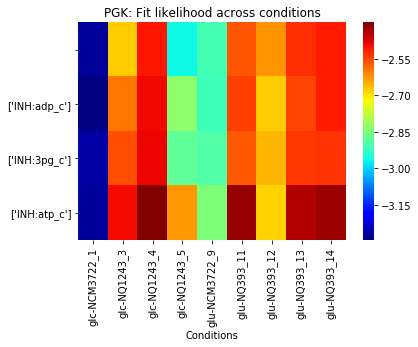

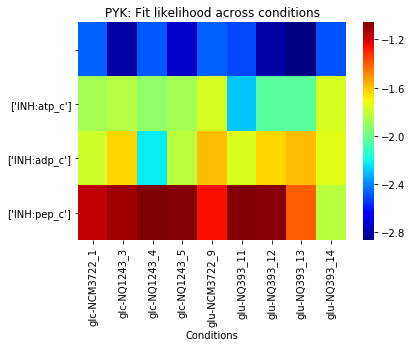

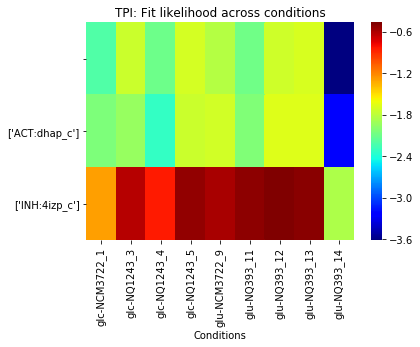

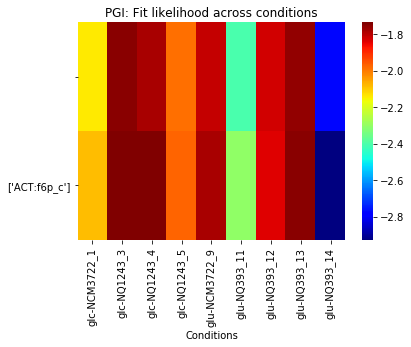

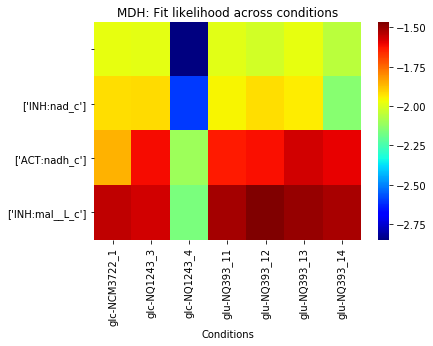

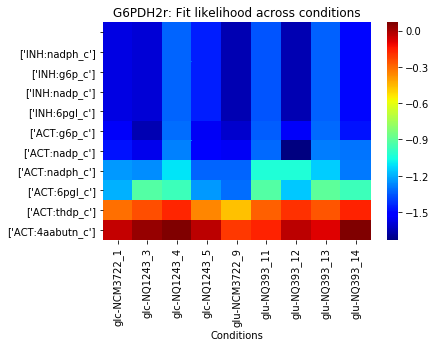

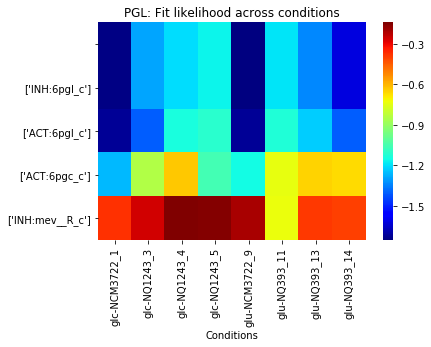

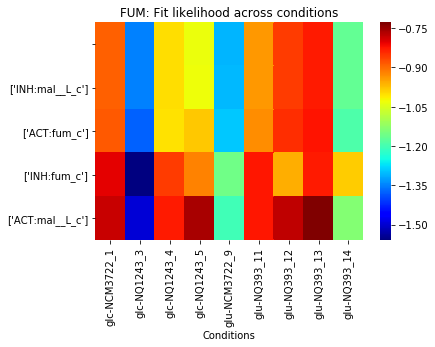

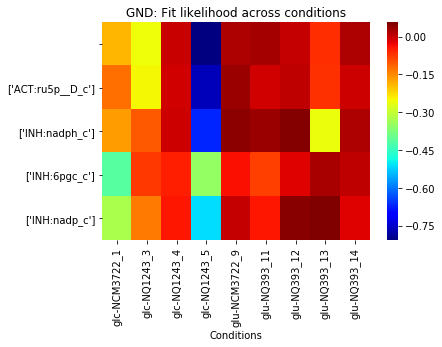

In [5]:
for rxn in list(reduced['rxn_id'].drop_duplicates()):
    arf.heatmap_across_conditions(reduced,rxn)

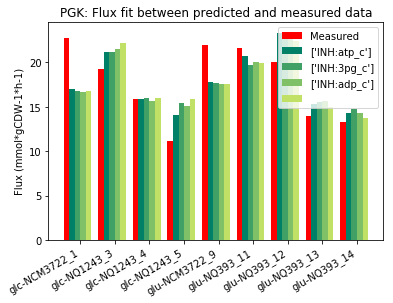

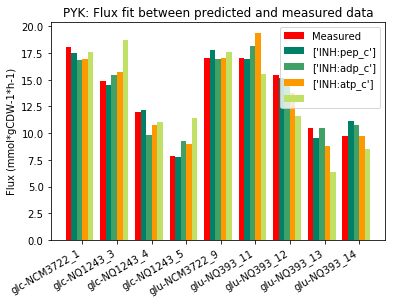

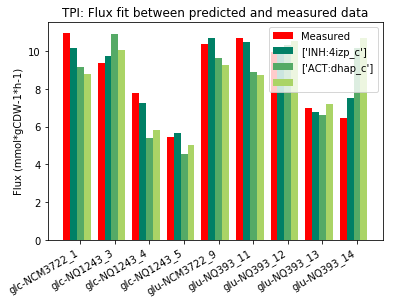

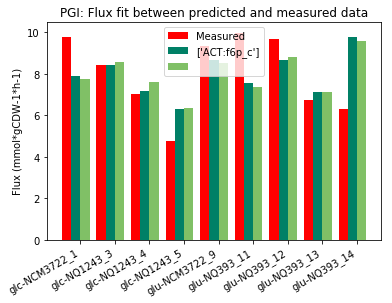

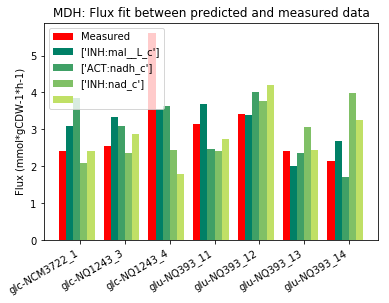

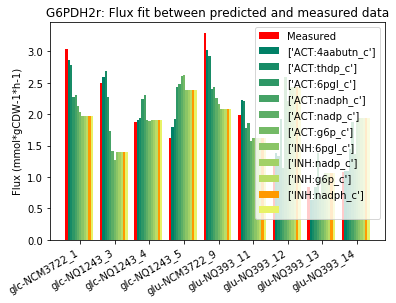

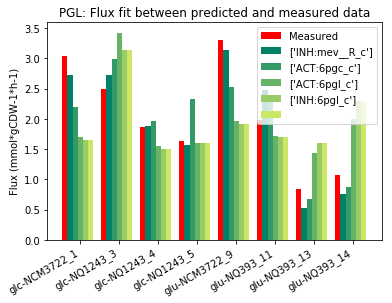

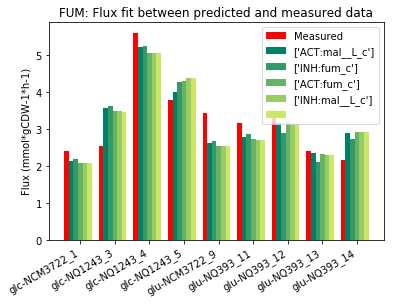

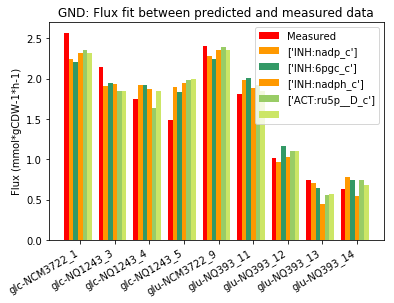

In [6]:
for rxn in list(reduced['rxn_id'].drop_duplicates()):
    arf.plot_fit(rxn,reduced,fullreg=reg_coli)

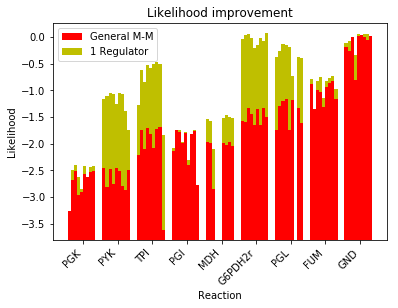

In [7]:
arf.plot_likelihood(reduced)